<a href="https://colab.research.google.com/github/Neoneto/Coding_Dojo_Week7/blob/main/Classification_Metrics_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Metrics (Practice)



Submitted by Kenneth Alaba

## Pre-processing

In [32]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix,roc_auc_score, plot_roc_curve

from sklearn.metrics import plot_confusion_matrix

In [3]:
# Load the data

## Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

## Opening the file
filename = '/content/drive/My Drive/Coding Dojo/07 Week 7: Classification Models/bank_modified.csv'

## Storing the data in df
df = pd.read_csv(filename, )

# display first few rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [4]:
# Check the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

In [6]:
df['y_yes'].value_counts(normalize = True)

0    0.88476
1    0.11524
Name: y_yes, dtype: float64

This tells us that the data is unbalanced

In [8]:
# Display the correlation of numerical columns
df.corr()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
age,1.000000,0.083820,-0.002367,-0.005148,-0.008894,-0.003511,-0.049307,0.015638,0.092979,-0.031083,0.453171,0.005505,-0.078352,-0.186691,-0.072723,-0.004259,0.060379,0.275139,-0.410768,-0.106872,-0.094042,0.081111,-0.017885,-0.193888,-0.011250,0.045092
balance,0.083820,1.000000,-0.015950,-0.009976,0.009437,0.026196,-0.057691,0.014523,0.035016,0.059753,0.068974,-0.002064,-0.033758,0.005540,-0.013779,-0.018902,0.002419,0.017158,0.007525,-0.076574,0.076487,0.019230,-0.070886,-0.050227,-0.071349,0.017905
duration,-0.002367,-0.015950,1.000000,-0.068382,0.010380,0.018080,0.028114,0.016267,0.017588,-0.006884,0.019331,0.000130,-0.001809,-0.008087,-0.020514,0.024507,-0.016668,-0.036436,0.024560,0.023179,-0.017779,-0.010802,-0.011615,0.015740,-0.004997,0.401118
campaign,-0.005148,-0.009976,-0.068382,1.000000,-0.093137,-0.067833,0.008783,-0.012910,-0.015051,0.030158,-0.024452,0.032040,0.002964,-0.017734,-0.008999,-0.006255,-0.007136,0.022000,-0.008093,-0.019510,0.022631,-0.020508,-0.012348,-0.003574,0.017120,-0.061147
pdays,-0.008894,0.009437,0.010380,-0.093137,1.000000,0.577562,0.009374,-0.014704,-0.021278,0.006268,-0.010853,-0.023614,-0.010810,0.008175,-0.002264,-0.005357,-0.003246,-0.016537,0.020693,0.011899,0.000377,0.004601,-0.026317,0.116893,-0.031086,0.104087
previous,-0.003511,0.026196,0.018080,-0.067833,0.577562,1.000000,-0.014861,-0.013226,-0.017453,0.001987,0.006662,0.005772,-0.018623,0.034265,0.009148,-0.005867,-0.002315,-0.017640,0.035558,-0.008410,0.026977,-0.004239,-0.026656,0.038621,-0.022115,0.116714
job_blue-collar,-0.049307,-0.057691,0.028114,0.008783,0.009374,-0.014861,1.000000,-0.101057,-0.081987,-0.268679,-0.119095,-0.105655,-0.163973,-0.070779,-0.232701,-0.087808,-0.047360,0.120618,-0.094010,0.045120,-0.321384,0.005109,-0.008048,0.175040,0.017244,-0.068147
job_entrepreneur,0.015638,0.014523,0.016267,-0.012910,-0.014704,-0.013226,-0.101057,1.000000,-0.031311,-0.102609,-0.045483,-0.040350,-0.062622,-0.027031,-0.088869,-0.033534,-0.018087,0.067564,-0.064801,-0.064775,0.058345,0.023790,0.037983,-0.002577,0.049794,-0.015968
job_housemaid,0.092979,0.035016,0.017588,-0.015051,-0.021278,-0.017453,-0.081987,-0.031311,1.000000,-0.083246,-0.036900,-0.032736,-0.050805,-0.021930,-0.072099,-0.027206,-0.014674,0.043095,-0.047196,-0.082916,-0.035585,0.002626,0.001298,-0.070044,-0.016287,0.004872
job_management,-0.031083,0.059753,-0.006884,0.030158,0.006268,0.001987,-0.268679,-0.102609,-0.083246,1.000000,-0.120923,-0.107277,-0.166491,-0.071865,-0.236274,-0.089156,-0.048088,-0.047153,0.044796,-0.407851,0.586132,-0.035407,-0.009598,-0.049460,-0.042099,0.032634


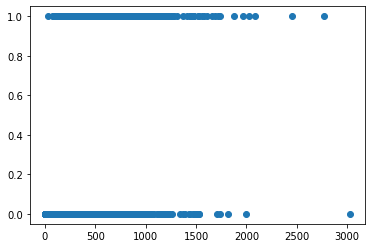

In [9]:
# Create a scatter plot
plt.scatter(df['duration'], df['y_yes'])

In [10]:
# Define the target and features
X = df.drop(columns=['y_yes'])
y = df['y_yes']

In [11]:
# Split into train and test sets
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42, stratify = y)

## Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Test accuracy = 0.885
Test sensitivity = 0.215
Test specificity = 0.972
Training AUC: 0.8691439345937136
Testing AUC: 0.8359717205871051


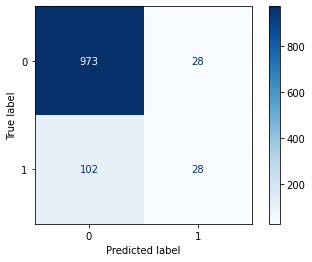

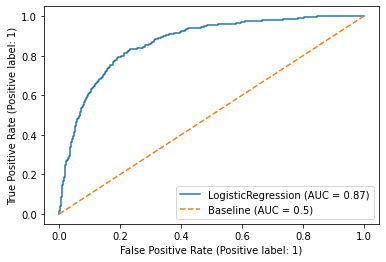

In [34]:
# Make an instance of the model
logreg = LogisticRegression(C = 10)
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)
# Scaling logistic regression
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg.fit(X_train, y_train)

lr_pred = logreg.predict(X_test)

# Evaluate baseline Logreg model
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues');

# Calculate the confusion matrix
confusion_test = confusion_matrix(y_test, lr_pred)

TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

# Calculate the metrics
accuracy = accuracy_score(y_test, lr_pred)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)

# Print the metrics
print(f'Test accuracy = {accuracy:.3f}')
print(f'Test sensitivity = {sensitivity:.3f}')
print(f'Test specificity = {specificity:.3f}')

# Calculate AUC for both training and testing sets
print(f'Training AUC: {roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])}')

# Visualize the ROC curve
plot_roc_curve(logreg, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();